# Introduction


This notebook is meant to introduce the concepts of getting the data from the web by using Python, including:

- The basics of HTML
- Downloading the webpage data
- Extracting the data 


In [0]:
# https://drive.google.com/open?id=1fhIrSnt9ldTEOCPP3JZNbe4gwUYbRs7p
# https://drive.google.com/open?id=1ZFpo-LDsy1aj0f_OoCMXMq2Qj2GkHNef

## The concepts of crawling

- Text here

## HTML tags

- Use slides

- http://altitudelabs.com/blog/web-scraping-with-python-and-beautiful-soup/

### Install the packages using pip

We will use the following packages to achieve the tasks in this lesson:

- requests
- beautifoulsoup4

In [1]:
!pip install requests
!pip install beautifulsoup4
!pip install nltk
!pip install wordcloud

### Import modules

In [0]:
# Crawling related modules
import requests
from bs4 import BeautifulSoup

#Data handling modules
import numpy as np
import pandas as pd

### Fetch webpage contents using requests

Anthony will update this

In [0]:
# Make the request to a url
url = "https://www.yelp.com/search?find_desc=Restaurants&find_loc=Quarry%20Bay%2C%20Hong%20Kong%2C%20HK"
r = requests.get(url)
c = r.content

In [0]:
 soup = BeautifulSoup(c)

## Data Handling

Here We will be using pandas for data exploration

For more detailed introduction, please look at
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

First we have a look at the example

In [0]:
sample_reviews = [ """Walking around the city and my dad said this was the place to go for pineapple buns $0.75 USD!!!
The buns are HUGE! We didn't try it with butter but I'm sure it would be even better.
We also ordered their milk tea. What a great combo, especially on a hot and humid July day!
You can't miss this place. There are plenty of people who walk by and stop by this stall--its right outside of a restaurant.""", 
"""Best pineapple buns ever. $10HKD and they're fresh, warm and have a slab of cold butter in them. I'd been getting them everywhere throughout HK but they're the largest, best texture, and best flavor here.
Note: they have a minimum charge per person to sit. It's listed in Chinese on the table but since none of us could read it, we didn't know.
Cash only.
""" ]

#### Common Text Processing Approach

- Tokenization: Convert sentence to words
- Drops punctuation, numbers, tags
- Removing Stop words (Words do not have specific meanings) such as "the", "is". 
- (Advanced) Stemming and lemmatization
The goal is to reduce inflectional forms or to reduce a word to a common base form.

> - am, are, is $\Rightarrow$ be
> - car, cars, car's, cars' $\Rightarrow$ car
> - the boy's cars are different colors $\Rightarrow$
the boy car be differ color



In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
#From sentence to words
sample_token = word_tokenize(sample_reviews[0])
nltk.FreqDist(sample_token)  # Many unwanted strings

# Drops punctuation, numbers, tags 
#sample_token1 = [word for word in sample_token if word.isalpha()] 
#nltk.FreqDist(sample_token1)  # Better but stop words

# Removing Stop Words
#sample_token2 = [word.lower() for word in sample_token1 if word not in stopwords.words('english')]
#nltk.FreqDist(sample_token2)

# How about noun and adj only?
#tags = nltk.pos_tag(sample_token2)
"""
1.     CC      Coordinating conjunction
2.     CD     Cardinal number
3.     DT     Determiner
4.     EX     Existential there
5.     FW     Foreign word
6.     IN     Preposition or subordinating conjunction
7.     JJ     Adjective
8.     JJR     Adjective, comparative
9.     JJS     Adjective, superlative
10.     LS     List item marker
11.     MD     Modal
12.     NN     Noun, singular or mass
13.     NNS     Noun, plural
14.     NNP     Proper noun, singular
15.     NNPS     Proper noun, plural
16.     PDT     Predeterminer
17.     POS     Possessive ending
18.     PRP     Personal pronoun
19.     PRP$     Possessive pronoun
20.     RB     Adverb
21.     RBR     Adverb, comparative
22.     RBS     Adverb, superlative
23.     RP     Particle
24.     SYM     Symbol
25.     TO     to
26.     UH     Interjection
27.     VB     Verb, base form
28.     VBD     Verb, past tense
29.     VBG     Verb, gerund or present participle
30.     VBN     Verb, past participle
31.     VBP     Verb, non-3rd person singular present
32.     VBZ     Verb, 3rd person singular present
33.     WDT     Wh-determiner
34.     WP     Wh-pronoun
35.     WP$     Possessive wh-pronoun
36.     WRB     Wh-adverb
"""
#accept_list = ["NN", "NNP", "NNS", "NNPS", "JJ", "JJR", "JJS"]
#sample_token3 = [word for word,pos in tags if pos in accept_list]

#Lemmatization
#wordnet_lemmatizer = WordNetLemmatizer()
#filtered_words = [wordnet_lemmatizer.lemmatize(word, pos="n") for word in sample_token3]

#nltk.FreqDist(sample_token2)
#fd = nltk.FreqDist(filtered_words)

'\n1.\xa0 \xa0\xa0\xa0CC\xa0 \xa0\xa0\xa0 Coordinating conjunction\n2. \xa0\xa0\xa0 CD \xa0\xa0\xa0 Cardinal number\n3. \xa0\xa0\xa0 DT \xa0\xa0\xa0 Determiner\n4. \xa0\xa0\xa0 EX \xa0\xa0\xa0 Existential there\n5. \xa0\xa0\xa0 FW \xa0\xa0\xa0 Foreign word\n6. \xa0\xa0\xa0 IN \xa0\xa0\xa0 Preposition or subordinating conjunction\n7. \xa0\xa0\xa0 JJ \xa0\xa0\xa0 Adjective\n8. \xa0\xa0\xa0 JJR \xa0\xa0\xa0 Adjective, comparative\n9. \xa0\xa0\xa0 JJS \xa0\xa0\xa0 Adjective, superlative\n10. \xa0\xa0\xa0 LS \xa0\xa0\xa0 List item marker\n11. \xa0\xa0\xa0 MD \xa0\xa0\xa0 Modal\n12. \xa0\xa0\xa0 NN \xa0\xa0\xa0 Noun, singular or mass\n13. \xa0\xa0\xa0 NNS \xa0\xa0\xa0 Noun, plural\n14. \xa0\xa0\xa0 NNP \xa0\xa0\xa0 Proper noun, singular\n15. \xa0\xa0\xa0 NNPS \xa0\xa0\xa0 Proper noun, plural\n16. \xa0\xa0\xa0 PDT \xa0\xa0\xa0 Predeterminer\n17. \xa0\xa0\xa0 POS \xa0\xa0\xa0 Possessive ending\n18. \xa0\xa0\xa0 PRP \xa0\xa0\xa0 Personal pronoun\n19. \xa0\xa0\xa0 PRP$ \xa0\xa0\xa0 Possessive pr

In [8]:
sample_token

['Walking',
 'around',
 'the',
 'city',
 'and',
 'my',
 'dad',
 'said',
 'this',
 'was',
 'the',
 'place',
 'to',
 'go',
 'for',
 'pineapple',
 'buns',
 '$',
 '0.75',
 'USD',
 '!',
 '!',
 '!',
 'The',
 'buns',
 'are',
 'HUGE',
 '!',
 'We',
 'did',
 "n't",
 'try',
 'it',
 'with',
 'butter',
 'but',
 'I',
 "'m",
 'sure',
 'it',
 'would',
 'be',
 'even',
 'better',
 '.',
 'We',
 'also',
 'ordered',
 'their',
 'milk',
 'tea',
 '.',
 'What',
 'a',
 'great',
 'combo',
 ',',
 'especially',
 'on',
 'a',
 'hot',
 'and',
 'humid',
 'July',
 'day',
 '!',
 'You',
 'ca',
 "n't",
 'miss',
 'this',
 'place',
 '.',
 'There',
 'are',
 'plenty',
 'of',
 'people',
 'who',
 'walk',
 'by',
 'and',
 'stop',
 'by',
 'this',
 'stall',
 '--',
 'its',
 'right',
 'outside',
 'of',
 'a',
 'restaurant',
 '.']

In [0]:
' '.join(filtered_words)

'city dad place pineapple bun bun huge butter i sure milk tea great combo hot humid july day place plenty people stall right outside restaurant'

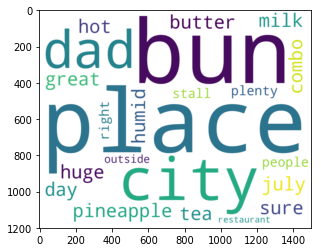

In [0]:
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words=1000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=500, height=400,
random_state=1).generate(' '.join(filtered_words))
plt.imshow(wc, interpolation='bilinear')

### Lemmatization showcase

In [0]:
## Effect
wordnet_lemmatizer = WordNetLemmatizer()
for word in sample_token2:
  print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

walking             walk                
around              around              
city                city                
dad                 dad                 
said                say                 
place               place               
go                  go                  
pineapple           pineapple           
buns                buns                
usd                 usd                 
the                 the                 
buns                buns                
huge                huge                
we                  we                  
try                 try                 
butter              butter              
i                   i                   
sure                sure                
would               would               
even                even                
better              better              
we                  we                  
also                also                
ordered             order               
milk            

In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
sid.polarity_scores("This is good restaurant with some bad dishes")

{'compound': -0.1531, 'neg': 0.282, 'neu': 0.484, 'pos': 0.234}

# Result

In [0]:
ktDF = pd.read_csv('kt_reviews.csv')
qbDF = pd.read_csv('qb_reviews.csv')

In [0]:
ktDF.head(3)

,rest,rating,reviews
0,Tim Ho Wan,5,I still dream about the dim sum from this plac...
1,Tim Ho Wan,4,"Good, but not great. However, the highly rated..."
2,Tim Ho Wan,3,Coming to Hong Kong I wanted to be sure to try...


In [0]:
ktDF.groupby('rest')['rating'].agg(['mean', 'count']).reset_index().head()

,rest,mean,count
0,2/3 Dolci,3.50,2
1,Amaroni’s,3.25,4
2,Amin Indonesian Restaurant,4.00,1
3,Ana Gura,4.00,2
4,Bau Heung Lau,3.00,1


In [0]:
def my_agg(x):
    names = {
        'r_mean': x['rating'].mean(),
        'r_count':  x['rating'].count(),
        'r_range': x['rating'].max() - x['rating'].min(),
        'r_max':  x['rating'].max(),
        'r_min': x['rating'].min()
        }

    return pd.Series(names, index=["r_mean", 'r_count', 'r_range','r_max', 'r_min'])

In [0]:
ktDF.groupby('rest').apply(my_agg).sort_values('r_count', ascending=False).head()

,r_mean,r_count,r_range,r_max,r_min
rest,,,,,
One Dim Sum,4.330000,100.0,4.0,5.0,1.0
Tim Ho Wan,4.250000,100.0,4.0,5.0,1.0
Hop Yik Tai Snacks,4.333333,21.0,3.0,5.0,2.0
Wai Kee Noodle Cafe,4.166667,12.0,2.0,5.0,3.0
Lau Sum Kee Noodle,4.083333,12.0,4.0,5.0,1.0


In [0]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
# Seaborn for plotting and styling
import seaborn as sns

In [0]:
ktDF['reviews_len'] = ktDF.reviews.str.len()

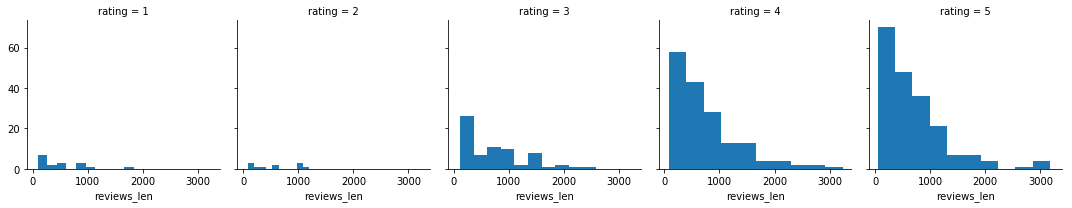

In [0]:
g = sns.FacetGrid(ktDF,col='rating')
g.map(plt.hist, 'reviews_len')

In [0]:
#(Extremely positive, positive, neutral, negative, Extremely negative) --> betwen (-1,1)
sid = SentimentIntensityAnalyzer()
ktDF['nltk_rating'] = ktDF['reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [0]:
ktDF.groupby('rating')['nltk_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1,17.0,-0.195424,0.731553,-0.9933,-0.872000,-0.27320,0.49800,0.9184
2,11.0,0.338073,0.568372,-0.6757,-0.005700,0.44900,0.77490,0.9726
3,69.0,0.649403,0.488314,-0.8646,0.612400,0.86930,0.95860,0.9972
4,168.0,0.804482,0.311318,-0.7875,0.796325,0.92575,0.97805,0.9991
5,198.0,0.860270,0.241135,-0.5525,0.875150,0.94660,0.98490,0.9991


In [0]:
accept_list = ["NN", "NNP", "NNS", "NNPS", "JJ", "JJR", "JJS", "CC", "RB"]
#accept_list = ["JJ", "JJR", "JJS"]
finalList =[]
finalList_str =[]
wordnet_lemmatizer = WordNetLemmatizer()
for each_review in ktDF.reviews.values:
  #tokenize the review
  tokens = word_tokenize(each_review)
  #Only Keep the english words
  filtered_tokens = [word for word in tokens if word.isalpha()]
  #Customize stopwords
  filtered_tokens = [word for word in tokens if word not in ['and', 'but', 'n\'t', 'good', 'here', 'sum', 'dim', 'so','restaurant', 'place', 'food']]
  #Get Pos tagging
  tags = nltk.pos_tag(filtered_tokens)
  final_tokens = [word for word,pos in tags if pos in accept_list]
  #Lemmatize on N and V
  final_tokens = [wordnet_lemmatizer.lemmatize(word, pos="n") for word in final_tokens]
  #final_tokens = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in final_tokens]
  finalList_str.append(" ".join(final_tokens))
  finalList.append(final_tokens)

ktDF['tokens_str'] = pd.Series(finalList_str)

In [0]:
# Get Top words
pd.Series([y for row in ktDF.tokens_str for y in row.split()]).value_counts()[:10].index

Index(['not', 'pork', 'very', 'just', 'dish', 'Hong', 'or', 'order', 'Kong',
       'bun'],
      dtype='object')

In [0]:
ktDF.head(2)

,rest,rating,reviews,reviews_len,nltk_rating,tokens_str,tokens,finalList_str
0,Tim Ho Wan,5,I still dream about the dim sum from this plac...,248,0.8704,still down best earth Probably only Michelin s...,"[still, dim, sum, down, best, dim, sum, earth,...",still dim sum down best dim sum earth Probably...
1,Tim Ho Wan,4,"Good, but not great. However, the highly rated...",798,0.9505,Good not great However highly item reason Bake...,"[Good, but, not, great, However, highly, item,...",Good but not great However highly item reason ...


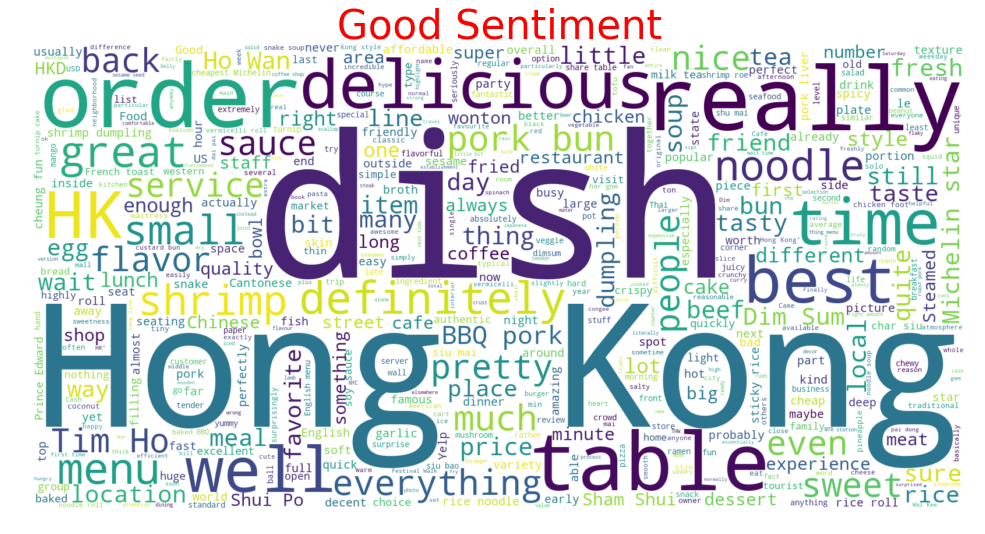

In [0]:
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(ktDF[(ktDF.rating>=4)]['tokens_str'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Good Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

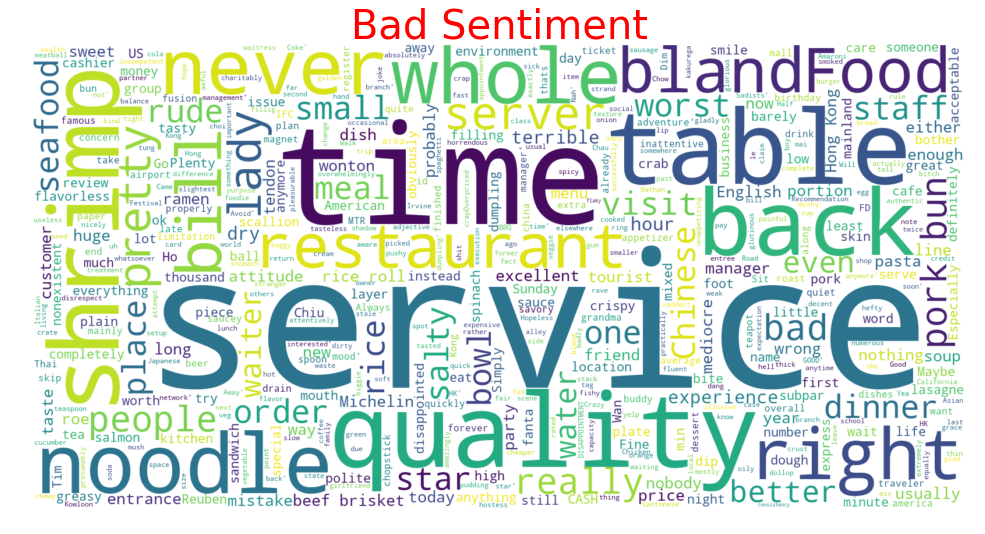

In [0]:
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(ktDF[(ktDF.rating<=2)]['tokens_str'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Bad Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()